#  <a> VDS 데이터 결정경계 가시화 </a>

### <a>필요한 라이블러리 불러오기</a>

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,  accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

# mlxtend가 설치가 안되어 있으면 아래 명령어로 설치하세요.
#!pip install mlxtend  
from mlxtend.plotting import plot_decision_regions

In [45]:

#import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam 

from livelossplot import PlotLossesKeras
from keras.utils import to_categorical

### <a> Load data set</a>

In [46]:
df = pd.read_csv("https://raw.githubusercontent.com/hongsukyi/Lectures/main/data/vds16.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8064 entries, 0 to 8063
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     8064 non-null   object 
 1   ToVol    8064 non-null   int64  
 2   SmVol    8064 non-null   int64  
 3   MeVol    8064 non-null   int64  
 4   LaVol    8064 non-null   int64  
 5   Speed    8064 non-null   float64
 6   OccRate  8064 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 441.1+ KB


In [47]:
df.head(3)

,Date,ToVol,SmVol,MeVol,LaVol,Speed,OccRate
0,2017-04-02 0:00,43,34,9,0,50.3,1.90
1,2017-04-02 0:05,45,32,13,0,58.9,1.84
2,2017-04-02 0:10,46,34,12,0,50.6,1.87


In [48]:
df['new_Date']=pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8064 entries, 0 to 8063
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      8064 non-null   object        
 1   ToVol     8064 non-null   int64         
 2   SmVol     8064 non-null   int64         
 3   MeVol     8064 non-null   int64         
 4   LaVol     8064 non-null   int64         
 5   Speed     8064 non-null   float64       
 6   OccRate   8064 non-null   float64       
 7   new_Date  8064 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 504.1+ KB


In [50]:
df.head()

,Date,ToVol,SmVol,MeVol,LaVol,Speed,OccRate,new_Date
0,2017-04-02 0:00,43,34,9,0,50.3,1.90,2017-04-02 00:00:00
1,2017-04-02 0:05,45,32,13,0,58.9,1.84,2017-04-02 00:05:00
2,2017-04-02 0:10,46,34,12,0,50.6,1.87,2017-04-02 00:10:00
3,2017-04-02 0:15,45,36,9,0,50.9,1.72,2017-04-02 00:15:00
4,2017-04-02 0:20,27,13,13,1,62.2,1.12,2017-04-02 00:20:00


In [51]:
df['time'] = df['new_Date'].dt.time
df['hour'] = df['new_Date'].dt.hour
df['day'] = df['new_Date'].dt.day
df['day_name'] = df['new_Date'].dt.day_name()
df['weekday'] = df['new_Date'].dt.weekday

In [52]:
df.head()

,Date,ToVol,SmVol,MeVol,LaVol,Speed,OccRate,new_Date,time,hour,day,day_name,weekday
0,2017-04-02 0:00,43,34,9,0,50.3,1.90,2017-04-02 00:00:00,00:00:00,0,2,Sunday,6
1,2017-04-02 0:05,45,32,13,0,58.9,1.84,2017-04-02 00:05:00,00:05:00,0,2,Sunday,6
2,2017-04-02 0:10,46,34,12,0,50.6,1.87,2017-04-02 00:10:00,00:10:00,0,2,Sunday,6
3,2017-04-02 0:15,45,36,9,0,50.9,1.72,2017-04-02 00:15:00,00:15:00,0,2,Sunday,6
4,2017-04-02 0:20,27,13,13,1,62.2,1.12,2017-04-02 00:20:00,00:20:00,0,2,Sunday,6


#### <a> 주말제외하고 평일만 사용해보자 </a>

In [53]:
df=df[df.weekday.isin([0,1,2,3,4])]

In [54]:
df.head(3)

,Date,ToVol,SmVol,MeVol,LaVol,Speed,OccRate,new_Date,time,hour,day,day_name,weekday
288,2017-04-03 0:00,30,21,9,0,58.6,1.09,2017-04-03 00:00:00,00:00:00,0,3,Monday,0
289,2017-04-03 0:05,28,17,11,0,57.5,1.29,2017-04-03 00:05:00,00:05:00,0,3,Monday,0
290,2017-04-03 0:10,42,33,8,1,53.1,1.53,2017-04-03 00:10:00,00:10:00,0,3,Monday,0


In [55]:
print(df['weekday'].unique())

[0 1 2 3 4]


In [56]:
df=df.reset_index(drop=True)

In [57]:
df.head(3)

,Date,ToVol,SmVol,MeVol,LaVol,Speed,OccRate,new_Date,time,hour,day,day_name,weekday
0,2017-04-03 0:00,30,21,9,0,58.6,1.09,2017-04-03 00:00:00,00:00:00,0,3,Monday,0
1,2017-04-03 0:05,28,17,11,0,57.5,1.29,2017-04-03 00:05:00,00:05:00,0,3,Monday,0
2,2017-04-03 0:10,42,33,8,1,53.1,1.53,2017-04-03 00:10:00,00:10:00,0,3,Monday,0


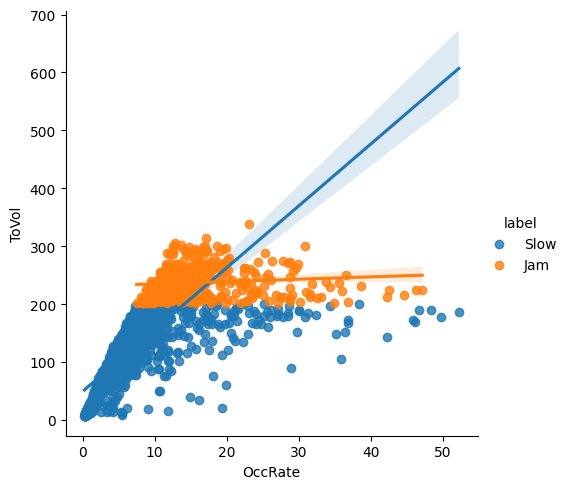

In [41]:
sns.lmplot(x="OccRate", y="ToVol", hue="label", data=df)

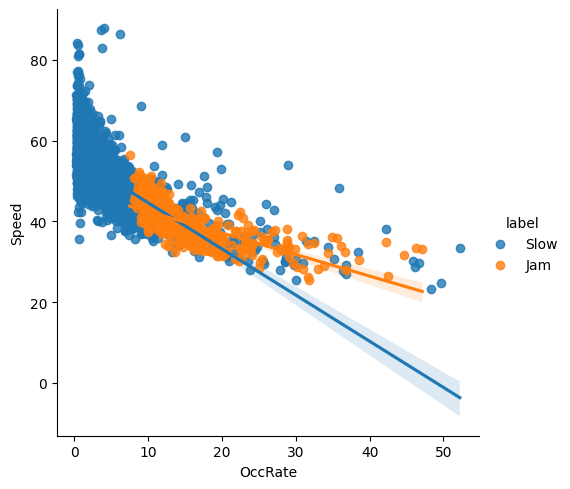

In [42]:
sns.lmplot(x="OccRate", y="Speed", hue="label", data=df)

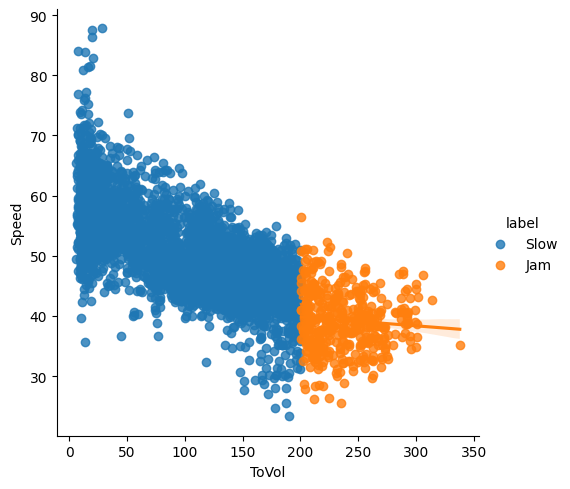

In [43]:
sns.lmplot(x="ToVol", y="Speed", hue="label", data=df)

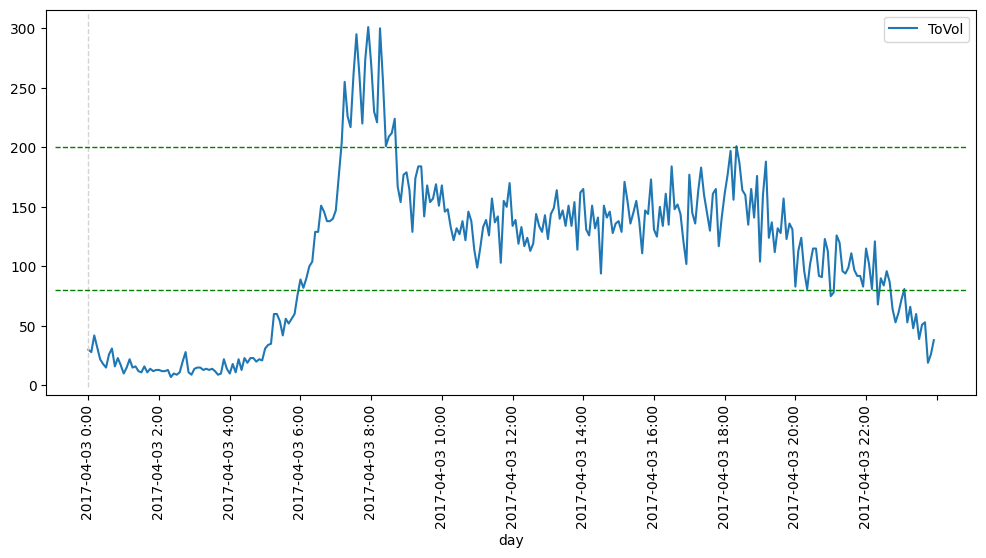

In [58]:
plt.figure(figsize=(12,5))
plt.plot(df["Date"][0:288],df["ToVol"][0:288],label='ToVol')
#plt.plot(df["ToVol"][288*4:288*5+1],label='ToVol')
plt.axvline(288*0, 0.02, 0.99, color='lightgray', linestyle='--', linewidth=1)
plt.axhline(80, 0.01, 0.99, color='g', linestyle='--', linewidth=1)
plt.axhline(200, 0.01, 0.99, color='g', linestyle='--', linewidth=1)
plt.xticks(np.arange(288*0,288*1+1,24),rotation=90)
plt.xlabel('day')
plt.legend()
plt.show()

## <a> 교통량 라벨은 2개로 해봄 </a>

In [59]:
def label_two(vol):
    if vol > 200 :
        label = 'Jam'
    else :
        label = 'Slow'
    return label

In [60]:
def label_three(vol):
    if vol < 100 :
        label = 'Normal'
    elif vol > 180 :
        label = 'Jam'
    else :
        label = 'Slow'
    return label

In [61]:
df.head()

,Date,ToVol,SmVol,MeVol,LaVol,Speed,OccRate,new_Date,time,hour,day,day_name,weekday
0,2017-04-03 0:00,30,21,9,0,58.6,1.09,2017-04-03 00:00:00,00:00:00,0,3,Monday,0
1,2017-04-03 0:05,28,17,11,0,57.5,1.29,2017-04-03 00:05:00,00:05:00,0,3,Monday,0
2,2017-04-03 0:10,42,33,8,1,53.1,1.53,2017-04-03 00:10:00,00:10:00,0,3,Monday,0
3,2017-04-03 0:15,32,22,9,1,56.2,1.25,2017-04-03 00:15:00,00:15:00,0,3,Monday,0
4,2017-04-03 0:20,22,15,7,0,52.8,1.02,2017-04-03 00:20:00,00:20:00,0,3,Monday,0


## <a> 라벨은 3개로 해보자. 교통량으로  </a>

In [62]:
num_classes = 3

In [63]:
if num_classes == 2 : 
    class_labels= ['Jam', 'Slow']
    df['label'] = df['ToVol'].apply(lambda vol : label_two(vol))
elif num_classes == 3: 
    class_labels= ['Jam', 'Slow', 'Normal']
    df['label'] = df['ToVol'].apply(lambda vol : label_three(vol))
else :
    print('Check the number of classes:', num_classes)

In [64]:
df.head()

,Date,ToVol,SmVol,MeVol,LaVol,Speed,OccRate,new_Date,time,hour,day,day_name,weekday,label
0,2017-04-03 0:00,30,21,9,0,58.6,1.09,2017-04-03 00:00:00,00:00:00,0,3,Monday,0,Normal
1,2017-04-03 0:05,28,17,11,0,57.5,1.29,2017-04-03 00:05:00,00:05:00,0,3,Monday,0,Normal
2,2017-04-03 0:10,42,33,8,1,53.1,1.53,2017-04-03 00:10:00,00:10:00,0,3,Monday,0,Normal
3,2017-04-03 0:15,32,22,9,1,56.2,1.25,2017-04-03 00:15:00,00:15:00,0,3,Monday,0,Normal
4,2017-04-03 0:20,22,15,7,0,52.8,1.02,2017-04-03 00:20:00,00:20:00,0,3,Monday,0,Normal


In [65]:
print('label unique:',df['label'].unique())

label unique: ['Normal' 'Slow' 'Jam']


<Axes: xlabel='hour', ylabel='ToVol'>

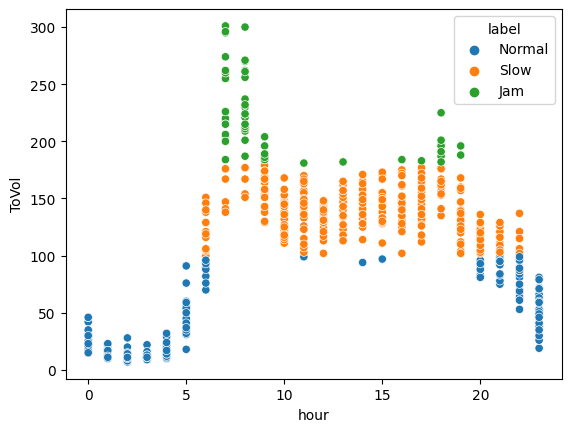

In [66]:
sns.scatterplot(data=df[:576], x = 'hour', y = 'ToVol', hue='label') 

Slow      2962
Normal    2097
Jam        701
Name: label, dtype: int64

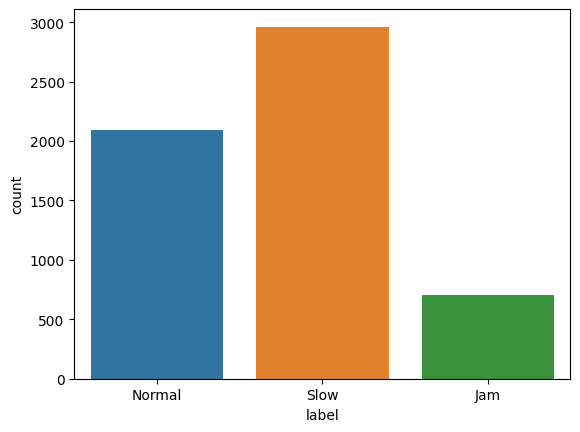

In [67]:
sns.countplot(x="label", data=df)
df.loc[:,'label'].value_counts()

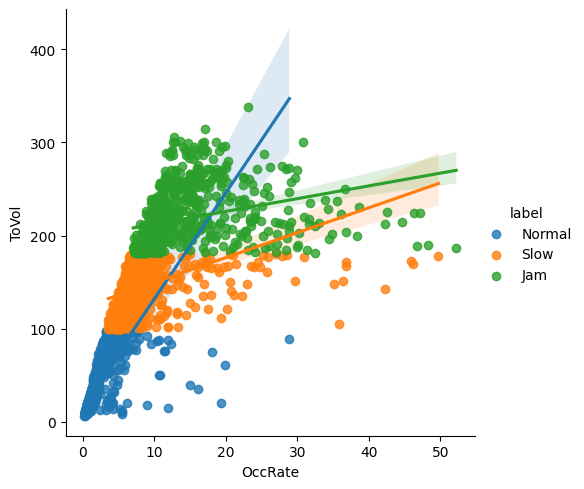

In [72]:
sns.lmplot(x="OccRate", y="ToVol", hue="label", data=df)

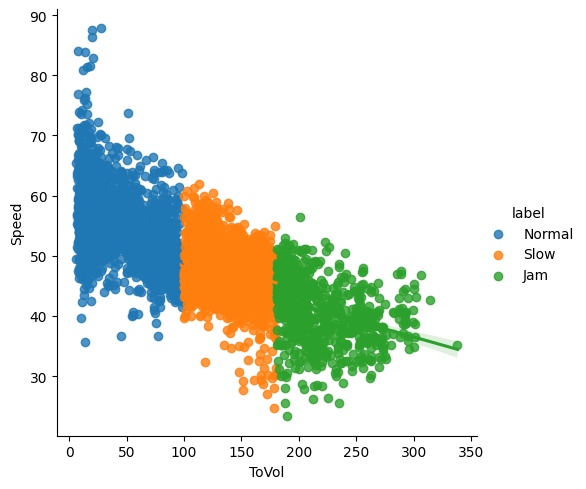

In [74]:
sns.lmplot(x="ToVol", y="Speed", hue="label", data=df)

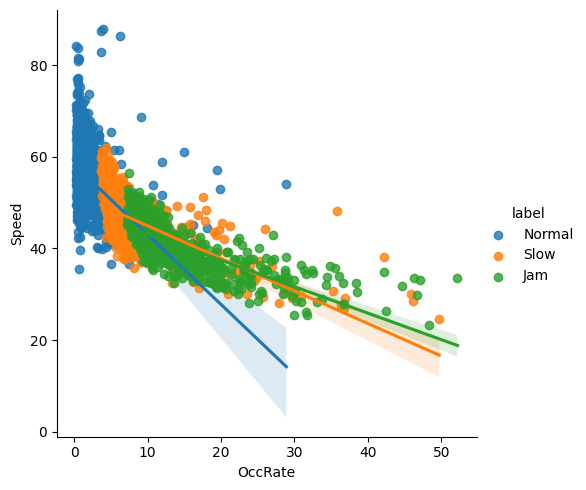

In [75]:
sns.lmplot(x="OccRate", y="Speed", hue="label", data=df)

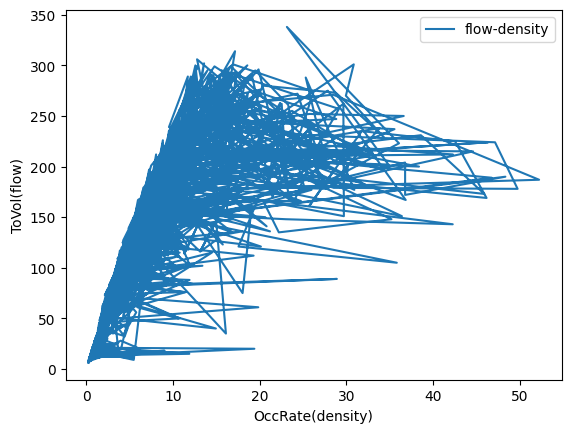

In [69]:
plt.plot(df["OccRate"],df["ToVol"],label='flow-density')
plt.ylabel('ToVol(flow)')
plt.xlabel('OccRate(density)')
plt.legend()
plt.show()

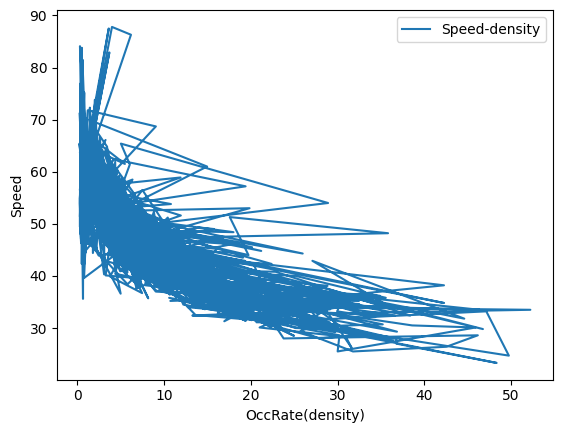

In [76]:
plt.plot(df["OccRate"],df["Speed"],label='Speed-density')
plt.ylabel('Speed')
plt.xlabel('OccRate(density)')
plt.legend()
plt.show()

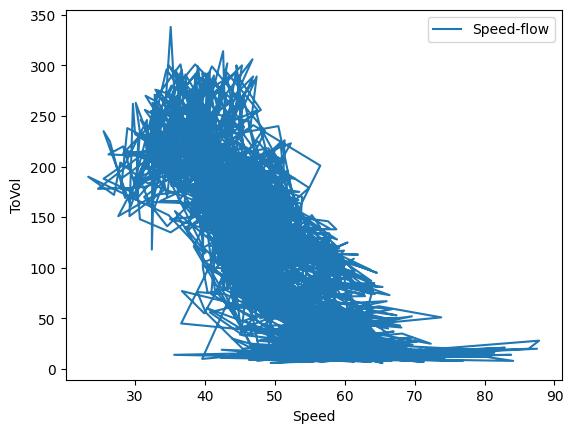

In [78]:
plt.plot(df["Speed"],df["ToVol"],label='Speed-flow')
plt.ylabel('ToVol')
plt.xlabel('Speed')
plt.legend()
plt.show()

In [26]:
X = df[['OccRate', 'ToVol']].values
#X = df[['OccRate', 'ToVol']]
y = df['label']

In [27]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [28]:
# OneHot encoding
y_onehot = to_categorical(y)

In [29]:
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=1)

In [31]:
np.random.seed(123)
def model_dnn():    
    model = Sequential([
        Dense(10, input_dim=X_train.shape[1], activation = 'relu', kernel_initializer='he_uniform'),
        Dense(10, activation= 'relu'),
        Dense(10, activation= 'relu'),
        Dense(num_classes, activation= 'softmax')
    ])  
    model.compile(loss="categorical_crossentropy", optimizer = Adam(learning_rate=0.005), metrics = ['accuracy'])
    return model

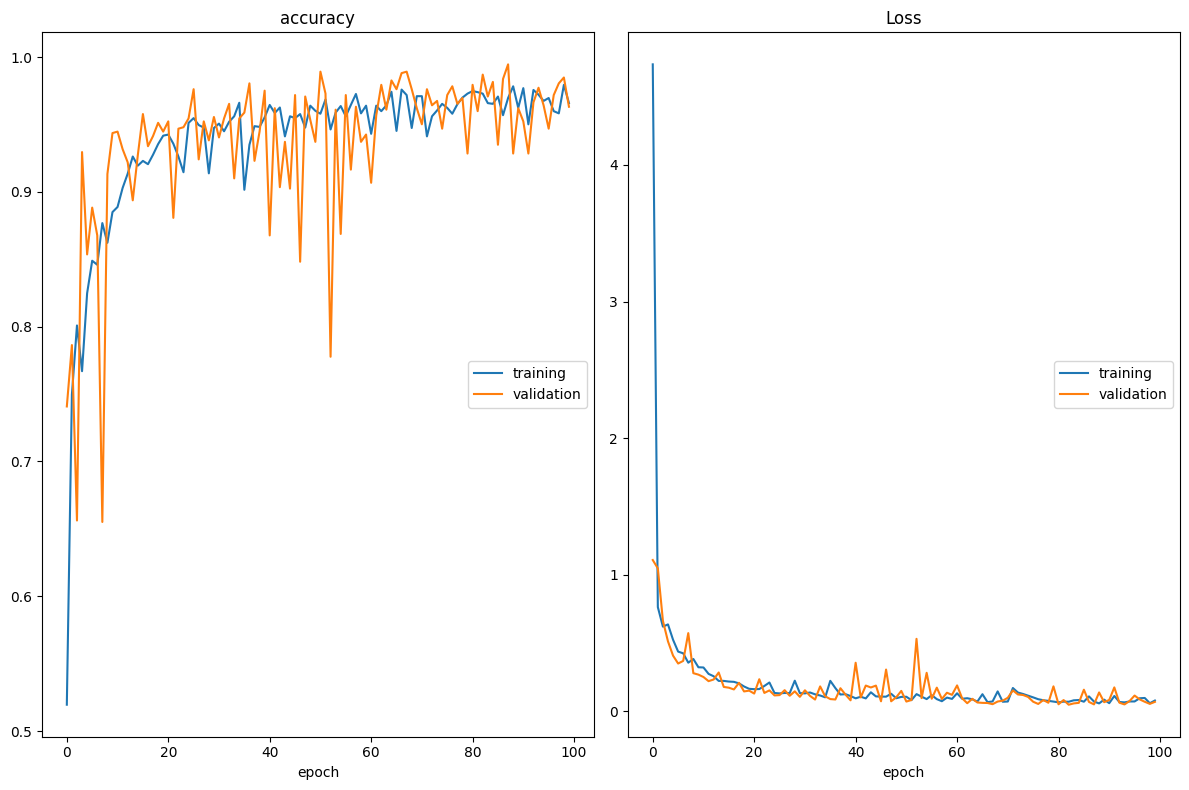

accuracy
	training         	 (min:    0.520, max:    0.979, cur:    0.966)
	validation       	 (min:    0.655, max:    0.995, cur:    0.963)
Loss
	training         	 (min:    0.056, max:    4.737, cur:    0.077)
	validation       	 (min:    0.046, max:    1.106, cur:    0.067)
116/116 [==============================] - 0s 4ms/step - loss: 0.0768 - accuracy: 0.9658 - val_loss: 0.0671 - val_accuracy: 0.9631


In [32]:
model = model_dnn()
#history = model.fit(X_train,y_train, epochs=100, validation_split=0.2)
history = model.fit(X_train,y_train, epochs=100, validation_split=0.2, callbacks=[PlotLossesKeras()])

In [33]:
model.evaluate(X_test,y_test)

36/36 [==============================] - 0s 1ms/step - loss: 0.0684 - accuracy: 0.9627


[0.0683862715959549, 0.9626736044883728]

In [34]:
class Onehot2Int(object):
    def __init__(self, model):
        self.model = model
    def predict(self, X):
        y_pred = self.model.predict(X)
        return np.argmax(y_pred, axis=1)    

9600/9600 [==============================] - 6s 626us/step


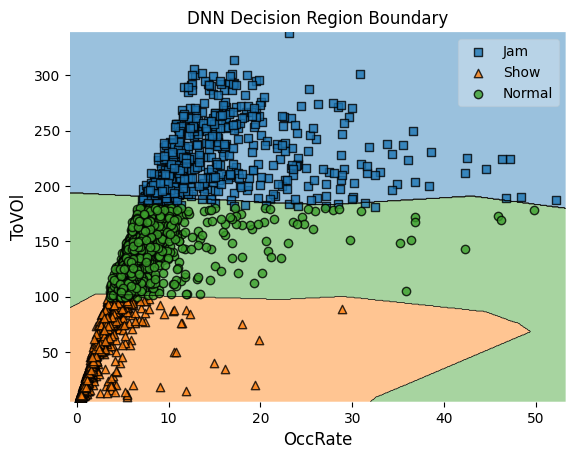

In [35]:
# Wrap keras model
model_no_ohe = Onehot2Int(model)

# Plot decision boundary
ax = plot_decision_regions(X, y, clf=model_no_ohe)
plt.xlabel("OccRate", size=12)
plt.ylabel("ToVOl", size=12)
plt.title('DNN Decision Region Boundary', size=12)
handles, labels = ax.get_legend_handles_labels()
if num_classes == 3 : 
    ax.legend(handles, [ 'Jam', 'Show', 'Normal'],  framealpha=0.3, scatterpoints=1)
elif  num_classes == 2 :
    ax.legend(handles, [ 'Jam', 'Show'],  framealpha=0.3, scatterpoints=1)
    
plt.show()

# PART II:  라벨 2개

In [36]:
num_classes = 2
class_labels= ['Jam', 'Slow']
df['label'] = df['ToVol'].apply(lambda vol : label_two(vol))

In [37]:
X = df[['OccRate', 'ToVol']].values
y = df['label']

encoder = LabelEncoder()
y = encoder.fit_transform(y)
# OneHot encoding
y_onehot = to_categorical(y)

In [38]:
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.3, random_state=1)

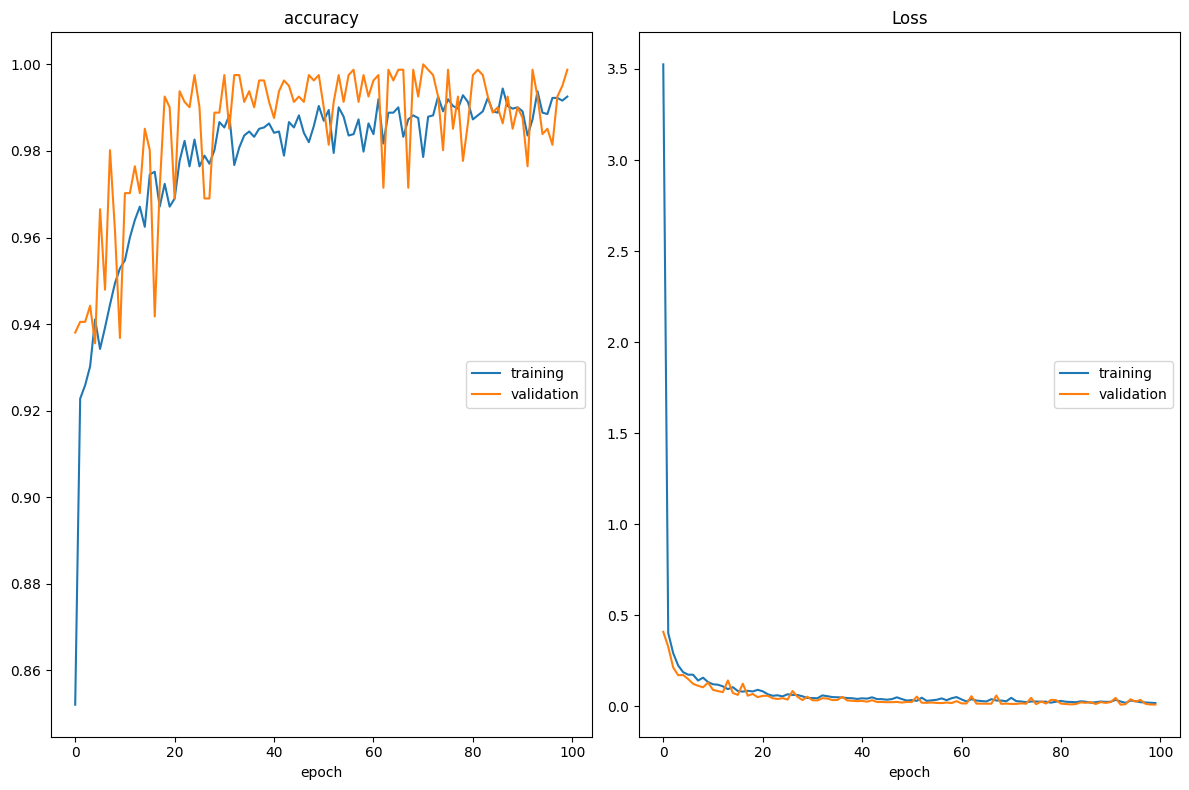

accuracy
	training         	 (min:    0.852, max:    0.994, cur:    0.993)
	validation       	 (min:    0.936, max:    1.000, cur:    0.999)
Loss
	training         	 (min:    0.019, max:    3.525, cur:    0.019)
	validation       	 (min:    0.009, max:    0.409, cur:    0.010)
101/101 [==============================] - 0s 5ms/step - loss: 0.0185 - accuracy: 0.9926 - val_loss: 0.0101 - val_accuracy: 0.9988


In [39]:
model = model_dnn()
#history = model.fit(X_train,y_train, epochs=100, validation_split=0.2)
history = model.fit(X_train,y_train, epochs=100, validation_split=0.2, callbacks=[PlotLossesKeras()])

9600/9600 [==============================] - 7s 768us/step


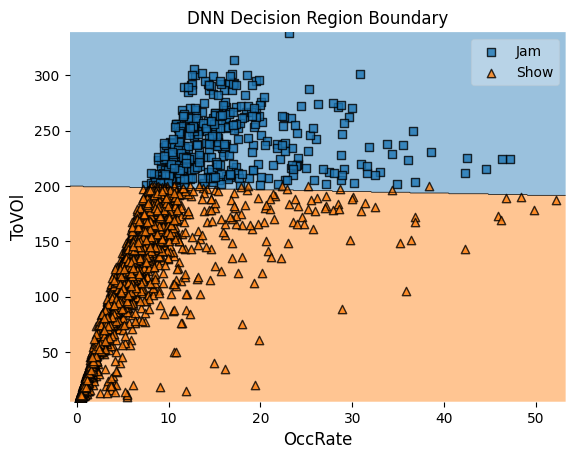

In [40]:
# Wrap keras model
model_no_ohe = Onehot2Int(model)

# Plot decision boundary
ax = plot_decision_regions(X, y, clf=model_no_ohe)
plt.xlabel("OccRate", size=12)
plt.ylabel("ToVOl", size=12)
plt.title('DNN Decision Region Boundary', size=12)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, [ 'Jam', 'Show'],  framealpha=0.3, scatterpoints=1)
   
plt.show()